In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn as sns

In [2]:
df = pd.read_csv('fraudTrain_org.csv')
pd.set_option("display.max_columns", None) # display all columns

In [3]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
df.isna().sum() # check for missing data

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
print(len(df['merchant'].unique()))
print(len(df['cc_num'].unique()))

693
983


In [8]:
# Count values in 'is_fraud' attribute: 0 = non_fraud transaction, 1 = fraud transaction.
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [9]:
# Calculate percentage of fraud transactions
print('Frauds', round(df['is_fraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Frauds 0.58 % of the dataset


Generate new features 'count_7_days' and 'count_30_days' corresponding to frequencies of transaction done in the last 7 and 30 days.

In [20]:
#to generate frequencies of transactions done in last 7/30days, I used pandas rolling function
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract frequencies of transactions in last 7/30 days
def last7DaysTransactionCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_7_days').sort_index()
    count_7_days = temp.rolling('7d').count() - 1
    count_7_days.index = temp.values
    x['count_7_days'] = count_7_days.reindex(x.index)
    return x
def last30DaysTransactionCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_30_days').sort_index()
    count_30_days = temp.rolling('30d').count() - 1
    count_30_days.index = temp.values
    x['count_30_days'] = count_30_days.reindex(x.index)
    return x

In [21]:
df_new = df.groupby('cc_num').apply(last7DaysTransactionCount)

In [22]:
df_new = df_new.groupby('cc_num').apply(last30DaysTransactionCount)

In [23]:
df_new.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,count_7_days,count_30_days
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0.0,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0.0,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0.0,0.0


UNDERSAMPLING DATASET

In [46]:
# Undersampling algorithm to generate smaller dataset with 50:50  distribution of fraud/non_fraud transactions

fraud_df = df_new.loc[df_new['is_fraud'] == 1]
non_fraud_df = df_new.loc[df_new['is_fraud'] == 0][:7506]  # since there are 7506 fraud transactions

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
sample_1 = normal_distributed_df.sample(frac=1, random_state=42)

sample_1.head(1)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,count_7_days,count_30_days
1239072,1239072,2020-06-01 01:01:21,565399283797,fraud_Koepp-Witting,grocery_pos,312.81,Anthony,Allen,M,6993 Carr Lodge Apt. 311,Jordan Valley,OR,97910,42.8801,-117.281,641,Economist,1993-11-24,c48f2efccb689f2daef9ebdb03e1edec,1370048481,42.663612,-117.720784,1,5.0,23.0


In [25]:
sample_1.drop('Unnamed: 0', axis=1, inplace=True)

In [26]:
sample_1.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,count_7_days,count_30_days
1239072,2020-06-01 01:01:21,565399283797,fraud_Koepp-Witting,grocery_pos,312.81,Anthony,Allen,M,6993 Carr Lodge Apt. 311,Jordan Valley,OR,97910,42.8801,-117.281,641,Economist,1993-11-24,c48f2efccb689f2daef9ebdb03e1edec,1370048481,42.663612,-117.720784,1,5.0,23.0


In [29]:
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 1239072 to 1261427
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  15012 non-null  datetime64[ns]
 1   cc_num                 15012 non-null  int64         
 2   merchant               15012 non-null  object        
 3   category               15012 non-null  object        
 4   amt                    15012 non-null  float64       
 5   first                  15012 non-null  object        
 6   last                   15012 non-null  object        
 7   gender                 15012 non-null  object        
 8   street                 15012 non-null  object        
 9   city                   15012 non-null  object        
 10  state                  15012 non-null  object        
 11  zip                    15012 non-null  int64         
 12  lat                    15012 non-null  float64      

In [30]:
sample_1['is_fraud'].value_counts()

1    7506
0    7506
Name: is_fraud, dtype: int64

In [27]:
# save sample_1 df to a csv file
sample_1.to_csv("Final_sample_1.csv", index=False)

In [28]:
# Clean "sample_1" from special characters that prevented it to be run in Weka.

import re
new_str = ''
string = open('Final_sample_1.csv').read()
new_str = re.sub('[^a-zA-Z0-9\n\,\-\:\"\. ]', ' ', string) #Replace all special characters in the list with ' '
open('Final_sample_1.csv', 'w').write(new_str.lower())

4054705

In [31]:
df1= pd.read_csv('Final_sample_1.csv')

In [32]:
df1.head(1)

,trans date trans time,cc num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city pop,job,dob,trans num,unix time,merch lat,merch long,is fraud,count 7 days,count 30 days
0,2020-06-01 01:01:21,565399283797,fraud koepp-witting,grocery pos,312.81,anthony,allen,m,6993 carr lodge apt. 311,jordan valley,or,97910,42.8801,-117.281,641,economist,1993-11-24,c48f2efccb689f2daef9ebdb03e1edec,1370048481,42.663612,-117.720784,1,5.0,23.0


In [34]:
# After attribute selection, drop not-interested attributes from dataframe
# and keep only attributes interested (amount, trans date trans time, DOB, count 7 days, count 30 days, category, is fraud) into a new dataframe 
sample_2 = df1.drop(['cc num','merchant','first','last','street','city','state','zip', 'lat','long','city pop','job','trans num','unix time','merch lat','merch long','gender'], axis = 1)

In [35]:
sample_2.head(2)

,trans date trans time,category,amt,dob,is fraud,count 7 days,count 30 days
0,2020-06-01 01:01:21,grocery pos,312.81,1993-11-24,1,5.0,23.0
1,2019-09-12 12:49:41,misc net,909.75,1972-07-01,1,24.0,119.0


TRANSFORMATION ATTRIBUTES

In [38]:
# Calculate age of users based on dob
sample_2['dob'] = sample_2.dob.str.slice(0,4)
#group year by tens
def group_by_10s(mylist):
    result = []
    decade = -1
    x = 0
    for i in (mylist):
        j = int(i)
        x = 2022 - j
        if x >= 80:
            result.append('80')
        elif x < 80 and x >= 70:
            result.append('70')
        elif x < 70 and x >= 60:
            result.append('60')
        elif x < 60 and x >= 50:
            result.append('50')
        elif x < 50 and x >= 40:
            result.append('40')
        elif x < 40 and x >= 30:
            result.append('30')
        elif x < 30 and x >= 20:
            result.append('20')
        else:
            result.append('18')
    return result

sample_2['age'] = (group_by_10s(sample_2['dob']))

In [39]:
sample_2.head(2)

,trans date trans time,category,amt,dob,is fraud,count 7 days,count 30 days,age
0,2020-06-01 01:01:21,grocery pos,312.81,1993,1,5.0,23.0,20
1,2019-09-12 12:49:41,misc net,909.75,1972,1,24.0,119.0,50


In [41]:
# Transformation on 'trans date trans time'
# Turn activity date to date/time object in python:
sample_2['trans date trans time'] = pd.to_datetime(sample_2['trans date trans time'])

# extract hour into new column 'hour'
sample_2['hour'] = sample_2['trans date trans time'].dt.hour  

# Group hour by 4
sample_2["hour"] = (sample_2["hour"].replace([0,1,2,3], "0-3"))
sample_2["hour"] = (sample_2["hour"].replace([4,5,6,7], "4-7"))
sample_2["hour"] = (sample_2["hour"].replace([8,9,10,11], "8-11"))
sample_2["hour"] = (sample_2["hour"].replace([12,13,14,15], "12-15"))
sample_2["hour"] = (sample_2["hour"].replace([16,17,18,19], "16-19"))
sample_2["hour"] = (sample_2["hour"].replace([20,21,22,23], "20-23"))

In [42]:
sample_2.head(2)

,trans date trans time,category,amt,dob,is fraud,count 7 days,count 30 days,age,hour
0,2020-06-01 01:01:21,grocery pos,312.81,1993,1,5.0,23.0,20,0-3
1,2019-09-12 12:49:41,misc net,909.75,1972,1,24.0,119.0,50,12-15


In [43]:
sample_3 = sample_2.drop(['trans date trans time','dob'], axis=1)

In [47]:
sample_3.head(2)

,category,amt,is fraud,count 7 days,count 30 days,age,hour
0,grocery pos,312.81,1,5.0,23.0,20,0-3
1,misc net,909.75,1,24.0,119.0,50,12-15


In [45]:
# save sample_3 df to a csv file
sample_3.to_csv("Final_sample_3.csv", index=False)

In [48]:
# count numbers of transactions each 4 hours
sample_3['hour'].value_counts() 

20-23    5433
0-3      3493
16-19    1877
12-15    1847
8-11     1198
4-7      1164
Name: hour, dtype: int64

In [51]:
# put obtained values in a list (list_1)
list_1 = sample_3['hour'].value_counts().to_list()
print(list_1)

[5433, 3493, 1877, 1847, 1198, 1164]


In [52]:
# count numbers of fraud-transactions each 4 hours
sample_3_fraud = sample_3[sample_3['is fraud'] == 1]
sample_3_fraud['hour'].value_counts()

20-23    3971
0-3      2527
16-19     316
12-15     312
4-7       202
8-11      178
Name: hour, dtype: int64

In [53]:
# put obtained values in a list (list_2)
list_2 = sample_3_fraud['hour'].value_counts().to_list()
print(list_2)

[3971, 2527, 316, 312, 202, 178]


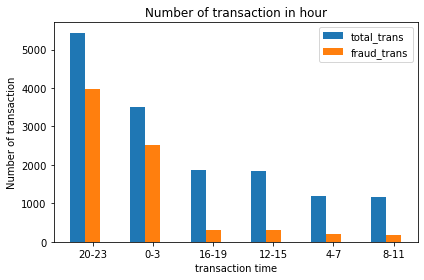

In [54]:
# BAR CHART - plt.bar(x,y) Number of total transaction and fraud transaction each 4 hours

hour_x = ['20-23', '0-3','16-19', '12-15', '4-7', '8-11']
x_indexes = np.arange(len(hour_x)) # arrange dif. bars
width = 0.25 #(width of the bar and distances between bars)
total_trans = list_1
plt.bar(x_indexes - width, total_trans, width = width, label='total_trans')
fraud_trans = list_2
plt.bar(x_indexes, fraud_trans, width = width, label='fraud_trans')

plt.xlabel('transaction time')
plt.ylabel('Number of transaction')
plt.title('Number of transaction in hour')
plt.xticks(ticks = x_indexes, labels = hour_x) # make tick and label right value on x-ax (instead of index)
plt.legend() # tell which line is which (add label to graph)
plt.tight_layout()
plt.show()